In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.optimize import minimize
import galkin
import galkin.processdata   # routines to process kinematic data
import galkin.readparsFile  # routines to read and check input parameters
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#10.3, 15.3, 7.7from the paper
# Galactic parameters
R0=8.0# Galactocentric distance (kpc)
V0=230.# local circular velocity (km/s)
UsunINUSE=11.10# solar motion in the U-direction (km/s), e.g. from Schoenrich+ '10, MNRAS 403, 1829 (2010)
VsunINUSE=12.24# solar motion in the V-direction (km/s), e.g. from Schoenrich+ '10, MNRAS 403, 1829 (2010)
WsunINUSE=07.25# solar motion in the W-direction (km/s), e.g. from Schoenrich+ '10, MNRAS 403, 1829 (2010)
SYSTDISP=0.# systematic dispersion due to spiral arm streaming (km/s)

In [3]:
# Flags
flagPROPERMOTIONS=0	 			# proper motions not supported in current version - please keep at 0
flagHITERMINAL=0				# whether to use HI terminal velocities
flagFich89tab2=0				# whether to use Fich+ '89, ApJ 342, 272 (1989) (Table 2)
flagMalhotra95=0				# whether to use Malhotra '95, ApJ 448, 138 (1995)
flagMcClureGriffithsDickey07=0			# whether to use McClure-Griffiths & Dickey '07, ApJ 671, 427 (2007)
flagHITHICKNESS=0				# whether to use the HI thickness method
flagHonmaSofue97=0				# whether to use Honma & Sofue '97, PASJ 49, 453 (1997)
flagCOTERMINAL=0				# whether to use CO terminal velocities
flagBurtonGordon78=0				# whether to use Burton & Gordon '78, A&A 63, 7 (1978)
flagClemens85=0					# whether to use Clemens '85, ApJ 295, 422 (1985)
flagKnapp85=0					# whether to use Knapp+ '85, AJ 90, 2 (1985)
flagLuna06=0					# whether to use Luna+ '06, ApJ 641, 938 (2006)
flagHIIREGIONS=1				# whether to use HII regions
flagBlitz79=0					# whether to use Blitz '79, ApJL 231, L115 (1979)
flagFich89tab1=0				# whether to use Fich+ '89, ApJ 342, 272 (1989) (Table 1)	
flagTurbideMoffat93=0				# whether to use Turbide & Moffat '93, AJ 105, 5 (1993)
flagBrandBlitz93=0				# whether to use Brand & Blitz '93, A&A 275, 67 (1993)
flagHou09tabA1=1				# whether to use Hou+ '09, A&A 499, 473 (2009) (Table A1)
flagGMC=0					# whether to use giant molecular clouds
flagHou09tabA2=0				# whether to use Hou+ '09, A&A 499, 473 (2009) (Table A2)
##
flagOPENCLUSTERS=0				# whether to use open clusters
flagFrinchaboyMajewski08=0			# whether to use Frinchaboy & Majewski '08, AJ 136, 118 (2008)
flagPLANETARYNEBULAE=0				# whether to use planetary nebulae
flagDurand98=0					# whether to use Durand+ '98, A&AS 132, 13 (1998)
flagCEPHEIDS=1					# whether to use classical cepheids
flagPont94=1					# whether to use Pont+ '94, A&A 285, 415 (1994)
flagPont97=0					# whether to use Pont+ '97, A&A 318, 416 (1997)
flagCSTARS=0					# whether to use carbon stars
flagDemersBattinelli07=0			# whether to use Demers & Battinelli '07, A&A 473, 143 (2007)
flagBattinelli12=0				# whether to use Battinelli+ '12, Ap 56, 68 (2013)
###
flagMASERS=0					# whether to use masers
flagReid14=0					# whether to use Reid+ '14, ApJ 783, 130 (2014)
flagHonma12=0					# whether to use Honma+ '12, PASJ 64, 136 (2012)
flagStepanishchevBobylev11=0			# whether to use Stepanishchev & Bobylev '11, AstL 37, 4 (2011)
flagXu13=0					# whether to use Xu+ '13, ApJ 769, 15 (2013)
flagBobylevBajkova13=0				# whether to use Bobylev & Bajkova '13, AstL 39, 809 (2013)
##
flagastropy=0				 	# whether to use astropy for equatorial-to-galactic conversions

In [4]:
inputpars=(R0,V0,UsunINUSE,VsunINUSE,WsunINUSE,SYSTDISP, flagPROPERMOTIONS,flagHITERMINAL,flagFich89tab2,flagMalhotra95,flagMcClureGriffithsDickey07, flagHITHICKNESS,flagHonmaSofue97,flagCOTERMINAL,flagBurtonGordon78,flagClemens85,flagKnapp85,flagLuna06, flagHIIREGIONS,flagBlitz79,flagFich89tab1,flagTurbideMoffat93,flagBrandBlitz93,flagHou09tabA1, flagGMC,flagHou09tabA2,flagOPENCLUSTERS,flagFrinchaboyMajewski08,flagPLANETARYNEBULAE,flagDurand98,flagCEPHEIDS,flagPont94,flagPont97, flagCSTARS,flagDemersBattinelli07,flagBattinelli12, flagMASERS,flagReid14,flagHonma12,flagStepanishchevBobylev11,flagXu13,flagBobylevBajkova13,flagastropy)

In [5]:
galkin.readparsFile.CheckAndPrintParameters(inputpars)

checking validity of input parameters...
printing input parameters...
 R0=  8.0  kpc
 V0=  230.0  km/s
 (Usun,Vsun,Wsun) = ( 11.1 , 12.24 , 7.25 ) km/s
 systematic dispersion =  0.0  km/s
 use HI terminal velocities?            0
 use HI thickness method?               0
 use CO terminal velocities?            0
 use HII regions?                       1
  use Blitz 79?                           0
  use Fich+ 89 (Table 1)?                 0
  use Turbide & Moffat 93?                0
  use Brand & Blitz 93?                   0
  use Hou+ 09 (Table A1)?                 1
 use giant molecular clouds?            0
 use open clusters?                     0
 use planetary nebulae?                 0
 use cepheids?                          1
  use Pont+ 94?                           1
  use Pont+ 97?                           0
 use C stars?                           0
 use masers?                            0
 use astropy?                           0


In [6]:
vecout=galkin.processdata.ProcessData(inputpars)
totallistvc=vecout[0]

processing HII regions...
 processing Hou+ 09 (Table A1)...
  selected  316  out of the total sample of  815  HII regions
processing classical cepheids...
 processing Pont+ 94...
  selected  245  out of the total sample of  278  cepheids


In [7]:
vecRp    = np.array([row[0] for row in totallistvc])# galactocentric distance [kpc]
vecerrRp = np.array([row[1] for row in totallistvc])# error in galactocentric distance [kpc]
vecvRp   = np.array([row[2] for row in totallistvc])# rotation velocity [km/s]
vecerrvRp= np.array([row[3] for row in totallistvc])# error in rotation velocity [km/s]

In [8]:
#Constants Model II
G = 4.302e-6#kpc/SM(km/s)^2
q_b = 0.6
r_b = 1.9#kpc
a_b = 1.#kpc
q_h = 0.8
alpha_b = 1.8
R_m = 4.#kpc
#parameters
rho_b_II = 0.3e9#sM/kpc^3
a_h_II = 1.9#kpc
rho_h_II = 0.266e9#SM/kpc^3
alpha_h_II = 1.63
beta_h_II = 2.17
R_d_II = 3.2#kpc
Sigma_d_SD_II = (536.0e6)*0.75#SM/kpc^2
Sigma_g_ISM_II = (536.0e6)*0.25#SM/kpc^2

# $R_{d}$ and $\rho_{b}$ for model II

In [9]:
def Vc_R_d_rho_b(R,parameter,alpha_h=1.,beta_h=3.,a_h=a_h_II,rho_h=rho_h_II,Sigma_d_SD=Sigma_d_SD_II,Sigma_g_ISM=Sigma_g_ISM_II):
    R_d,rho_b = parameter
    def Vc_b(R):
        def I_b(x,R):
            e = np.sqrt(1. - q_b**2.)
            n = x**(2.-alpha_b)*np.exp(-(R**2.*x**2.)/r_b**2.)
            d = np.sqrt(1.-x**2.*e**2.)
            t = R**2.*(R/a_b)**(-alpha_b)
            return (t*n)/d
        Integral_b = []
        for i in range (0,len(R)):
            result = integrate.quad(I_b,0,1,args=(R[i]))[0]
            Integral_b.append(result)
        return np.array(Integral_b)
    def Vc_DM(R):
        def I_h(x,R):
            e = np.sqrt(1.- q_h**2.)
            n = x**(2.-alpha_h)*(1.+ (x*R)/(a_h))**(alpha_h-beta_h)
            d = np.sqrt(1-x**2.*e**2)
            t = R**2.*(R/a_h)**(-alpha_h)
            result = (t*n)/d
            return result
        Integral_DM = []
        for i in range (0,len(R)):
            result = integrate.quad(I_h,0,1,args=(R[i]))[0]
            Integral_DM.append(result)
        return np.array(Integral_DM)
    def V2_c_SD(R):
        result = (R_d/R) - np.exp(-R/R_d) - (np.exp(-R/R_d)*R_d/R)
        return result
    def Vc_ISM(R):
        def M_g_ISM(u,R):
            return R*u*np.exp(-((R*u)/(2.*R_d))-(R_m/(R*u)))
        Integral_M_g = []
        for i in range (0,len(R)):
            result = integrate.quad(M_g_ISM,0,1,args=(R[i]))[0]
            Integral_M_g.append(result)
        return np.array(Integral_M_g)
    suma = 4.*np.pi*G*q_b*rho_b*Vc_b(R) + 4.*np.pi*G*q_h*rho_h*Vc_DM(R) + 2.*np.pi*G*Sigma_d_SD*R_d*V2_c_SD(R) + 2.*np.pi*Sigma_g_ISM*G*Vc_ISM(R)
    return np.sqrt(suma)

In [10]:
def Xi2_R_d_rho_b(parameters):
    R_d,rho_b = parameters
    par = R_d,np.exp(rho_b)
    model = Vc_R_d_rho_b(vecRp,par)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [11]:
x0_R_d_rho_b = np.array([1.0,np.log(1.0e8)])

In [12]:
LS_R_d_rho_b = minimize(Xi2_R_d_rho_b,x0_R_d_rho_b,method='L-BFGS-B',bounds=((1.,15.),(np.log(0.1e8),np.log(20.0e8)),))

In [13]:
print LS_R_d_rho_b

      fun: 2334.487106685292
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([4.54747351e-05, 1.31876732e-03])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 54
      nit: 16
   status: 0
  success: True
        x: array([ 9.91837389, 21.39854784])


In [14]:
pars_R_d_rho_b_min = np.array([LS_R_d_rho_b.x[0],np.exp(LS_R_d_rho_b.x[1])])
print pars_R_d_rho_b_min

[9.91837389e+00 1.96458692e+09]


In [15]:
R = np.linspace(0.1,15.,100)

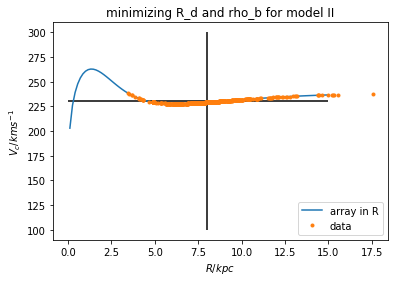

In [16]:
plt.plot(R,Vc_R_d_rho_b(R,pars_R_d_rho_b_min),label='array in R')
plt.plot(vecRp,Vc_R_d_rho_b(vecRp,pars_R_d_rho_b_min),'.',label='data')
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.legend(loc='lower right', prop={'size':10})
plt.title("minimizing R_d and rho_b for model II")
plt.hlines(230,0,15)
plt.vlines(8,100,300)

# $\Sigma_{SD}$ y $\rho_{b}$ for model II

In [17]:
def Vc_Sigma_SD_rho_b(R,parameter,alpha_h=1.,beta_h=3.,a_h=a_h_II,rho_h=rho_h_II,R_d=R_d_II,Sigma_g_ISM=Sigma_g_ISM_II):
    Sigma_d_SD,rho_b = parameter
    def Vc_b(R):
        def I_b(x,R):
            e = np.sqrt(1. - q_b**2.)
            n = x**(2.-alpha_b)*np.exp(-(R**2.*x**2.)/r_b**2.)
            d = np.sqrt(1.-x**2.*e**2.)
            t = R**2.*(R/a_b)**(-alpha_b)
            return (t*n)/d
        Integral_b = []
        for i in range (0,len(R)):
            result = integrate.quad(I_b,0,1,args=(R[i]))[0]
            Integral_b.append(result)
        return np.array(Integral_b)
    def Vc_DM(R):
        def I_h(x,R):
            e = np.sqrt(1.- q_h**2.)
            n = x**(2.-alpha_h)*(1.+ (x*R)/(a_h))**(alpha_h-beta_h)
            d = np.sqrt(1-x**2.*e**2)
            t = R**2.*(R/a_h)**(-alpha_h)
            result = (t*n)/d
            return result
        Integral_DM = []
        for i in range (0,len(R)):
            result = integrate.quad(I_h,0,1,args=(R[i]))[0]
            Integral_DM.append(result)
        return np.array(Integral_DM)
    def V2_c_SD(R):
        result = (R_d/R) - np.exp(-R/R_d) - (np.exp(-R/R_d)*R_d/R)
        return result
    def Vc_ISM(R):
        def M_g_ISM(u,R):
            return R*u*np.exp(-((R*u)/(2.*R_d))-(R_m/(R*u)))
        Integral_M_g = []
        for i in range (0,len(R)):
            result = integrate.quad(M_g_ISM,0,1,args=(R[i]))[0]
            Integral_M_g.append(result)
        return np.array(Integral_M_g)
    suma = 4.*np.pi*G*q_b*rho_b*Vc_b(R) + 4.*np.pi*G*q_h*rho_h*Vc_DM(R) + 2.*np.pi*G*Sigma_d_SD*R_d*V2_c_SD(R) + 2.*np.pi*Sigma_g_ISM*G*Vc_ISM(R)
    return np.sqrt(suma)

In [18]:
def Xi2_Sigma_SD_rho_b(parameters):
    Sigma_d_SD,rho_b = parameters
    par = np.exp(Sigma_d_SD),np.exp(rho_b)
    model = Vc_Sigma_SD_rho_b(vecRp,par)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [19]:
x0_Sigma_SD_rho_b = np.array([np.log(1.1e8),np.log(1.1e8)])

In [20]:
LS_Sigma_SD_rho_b = minimize(Xi2_Sigma_SD_rho_b,x0_Sigma_SD_rho_b,method='L-BFGS-B',bounds=((np.log(1.1e8),np.log(15.0e8)),(np.log(1.1e8),np.log(10.0e8)),))

In [21]:
print LS_Sigma_SD_rho_b

      fun: 2180.3537987463183
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.95693424e+03,  5.91171556e-04])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 42
      nit: 12
   status: 0
  success: True
        x: array([21.12873095, 20.02512259])


In [22]:
print np.exp(LS_Sigma_SD_rho_b.x)

[1.50000000e+09 4.97508198e+08]


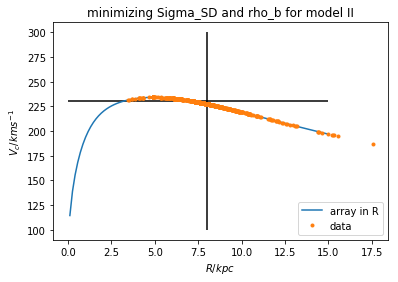

In [23]:
plt.plot(R,Vc_Sigma_SD_rho_b(R,np.exp(LS_Sigma_SD_rho_b.x)),label='array in R')
plt.plot(vecRp,Vc_Sigma_SD_rho_b(vecRp,np.exp(LS_Sigma_SD_rho_b.x)),'.',label='data')
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.legend(loc='lower right', prop={'size':10})
plt.title("minimizing Sigma_SD and rho_b for model II")
plt.hlines(230,0,15)
plt.vlines(8,100,300)

# $R_{d}$, $\Sigma_{SD}$ and $\rho_{b}$ for model II with NFW

In [24]:
def Vc_Sigma_SD_rho_b_R_d(R,parameter,alpha_h=1.,beta_h=3.,a_h=a_h_II,rho_h=rho_h_II,Sigma_g_ISM=Sigma_g_ISM_II):
    Sigma_d_SD,rho_b,R_d = parameter
    def Vc_b(R):
        def I_b(x,R):
            e = np.sqrt(1. - q_b**2.)
            n = x**(2.-alpha_b)*np.exp(-(R**2.*x**2.)/r_b**2.)
            d = np.sqrt(1.-x**2.*e**2.)
            t = R**2.*(R/a_b)**(-alpha_b)
            return (t*n)/d
        Integral_b = []
        for i in range (0,len(R)):
            result = integrate.quad(I_b,0,1,args=(R[i]))[0]
            Integral_b.append(result)
        return np.array(Integral_b)
    def Vc_DM(R):
        def I_h(x,R):
            e = np.sqrt(1.- q_h**2.)
            n = x**(2.-alpha_h)*(1.+ (x*R)/(a_h))**(alpha_h-beta_h)
            d = np.sqrt(1-x**2.*e**2)
            t = R**2.*(R/a_h)**(-alpha_h)
            result = (t*n)/d
            return result
        Integral_DM = []
        for i in range (0,len(R)):
            result = integrate.quad(I_h,0,1,args=(R[i]))[0]
            Integral_DM.append(result)
        return np.array(Integral_DM)
    def V2_c_SD(R):
        result = (R_d/R) - np.exp(-R/R_d) - (np.exp(-R/R_d)*R_d/R)
        return result
    def Vc_ISM(R):
        def M_g_ISM(u,R):
            return R*u*np.exp(-((R*u)/(2.*R_d))-(R_m/(R*u)))
        Integral_M_g = []
        for i in range (0,len(R)):
            result = integrate.quad(M_g_ISM,0,1,args=(R[i]))[0]
            Integral_M_g.append(result)
        return np.array(Integral_M_g)
    suma = 4.*np.pi*G*q_b*rho_b*Vc_b(R) + 4.*np.pi*G*q_h*rho_h*Vc_DM(R) + 2.*np.pi*G*Sigma_d_SD*R_d*V2_c_SD(R) + 2.*np.pi*Sigma_g_ISM*G*Vc_ISM(R)
    return np.sqrt(suma)

In [25]:
def Xi2_Sigma_SD_rho_b_R_d(parameters):
    Sigma_d_SD,rho_b,R_d = parameters
    par = np.exp(Sigma_d_SD),np.exp(rho_b),R_d
    model = Vc_Sigma_SD_rho_b_R_d(vecRp,par)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [26]:
x0_Sigma_SD_rho_b_R_d = np.array([np.log(1.1e8),np.log(1.1e8),1.])

In [27]:
LS_Sigma_SD_rho_b_R_d = minimize(Xi2_Sigma_SD_rho_b_R_d,x0_Sigma_SD_rho_b_R_d,method='L-BFGS-B',bounds=((np.log(1.1e8),np.log(15.0e8)),(np.log(1.1e8),np.log(10.0e8)),(1.,9.),))

In [28]:
print LS_Sigma_SD_rho_b_R_d

      fun: 2031.0567998170577
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-262.15279831,  -12.71321253,  -18.46165105])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 132
      nit: 20
   status: 0
  success: True
        x: array([20.83192679, 20.0074454 ,  4.17635743])


In [29]:
pars_R_d_rho_b_R_d_min = np.array([np.exp(LS_Sigma_SD_rho_b_R_d.x[0]),np.exp(LS_Sigma_SD_rho_b_R_d.x[1]),LS_Sigma_SD_rho_b_R_d.x[2]])
print pars_R_d_rho_b_R_d_min

[1.11478432e+09 4.88790923e+08 4.17635743e+00]


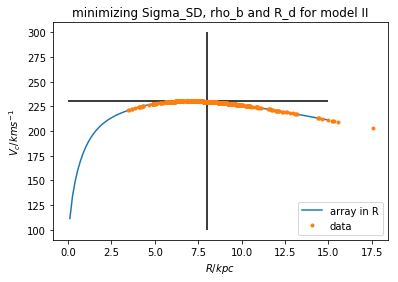

In [30]:
plt.plot(R,Vc_Sigma_SD_rho_b_R_d(R,pars_R_d_rho_b_R_d_min),label='array in R')
plt.plot(vecRp,Vc_Sigma_SD_rho_b_R_d(vecRp,pars_R_d_rho_b_R_d_min),'.',label='data')
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.legend(loc='lower right', prop={'size':10})
plt.title("minimizing Sigma_SD, rho_b and R_d for model II")
plt.hlines(230,0,15)
plt.vlines(8,100,300)

# $R_{d}$, $\Sigma_{SD}$ and $\rho_{b}$ for model II

In [44]:
def Vc_Sigma_SD_rho_b_R_d_II(R,parameter,alpha_h=alpha_h_II,beta_h=beta_h_II,a_h=a_h_II,rho_h=rho_h_II,Sigma_g_ISM=Sigma_g_ISM_II):
    Sigma_d_SD,rho_b,R_d = parameter
    def Vc_b(R):
        def I_b(x,R):
            e = np.sqrt(1. - q_b**2.)
            n = x**(2.-alpha_b)*np.exp(-(R**2.*x**2.)/r_b**2.)
            d = np.sqrt(1.-x**2.*e**2.)
            t = R**2.*(R/a_b)**(-alpha_b)
            return (t*n)/d
        Integral_b = []
        for i in range (0,len(R)):
            result = integrate.quad(I_b,0,1,args=(R[i]))[0]
            Integral_b.append(result)
        return np.array(Integral_b)
    def Vc_DM(R):
        def I_h(x,R):
            e = np.sqrt(1.- q_h**2.)
            n = x**(2.-alpha_h)*(1.+ (x*R)/(a_h))**(alpha_h-beta_h)
            d = np.sqrt(1-x**2.*e**2)
            t = R**2.*(R/a_h)**(-alpha_h)
            result = (t*n)/d
            return result
        Integral_DM = []
        for i in range (0,len(R)):
            result = integrate.quad(I_h,0,1,args=(R[i]))[0]
            Integral_DM.append(result)
        return np.array(Integral_DM)
    def V2_c_SD(R):
        result = (R_d/R) - np.exp(-R/R_d) - (np.exp(-R/R_d)*R_d/R)
        return result
    def Vc_ISM(R):
        def M_g_ISM(u,R):
            return R*u*np.exp(-((R*u)/(2.*R_d))-(R_m/(R*u)))
        Integral_M_g = []
        for i in range (0,len(R)):
            result = integrate.quad(M_g_ISM,0,1,args=(R[i]))[0]
            Integral_M_g.append(result)
        return np.array(Integral_M_g)
    suma = 4.*np.pi*G*q_b*rho_b*Vc_b(R) + 4.*np.pi*G*q_h*rho_h*Vc_DM(R) + 2.*np.pi*G*Sigma_d_SD*R_d*V2_c_SD(R) + 2.*np.pi*Sigma_g_ISM*G*Vc_ISM(R)
    return np.sqrt(suma)

In [45]:
def Xi2_Sigma_SD_rho_b_R_d_II(parameters):
    Sigma_d_SD,rho_b,R_d = parameters
    par = np.exp(Sigma_d_SD),np.exp(rho_b),R_d
    model = Vc_Sigma_SD_rho_b_R_d_II(vecRp,par)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [54]:
x0_Sigma_SD_rho_b_R_d_II = np.array([np.log(0.1e8),np.log(0.0001e8),1.])

In [55]:
LS_Sigma_SD_rho_b_R_d_II = minimize(Xi2_Sigma_SD_rho_b_R_d_II,x0_Sigma_SD_rho_b_R_d_II,method='L-BFGS-B',bounds=((np.log(0.1e8),np.log(15.0e8)),(np.log(0.0001e8),np.log(10.0e8)),(1.0,9.),))

In [56]:
print LS_Sigma_SD_rho_b_R_d_II

      fun: 2004.5834938923779
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00190994,  0.00106866, -0.00090949])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 108
      nit: 14
   status: 0
  success: True
        x: array([20.65712749,  9.3583474 ,  2.87798118])


In [57]:
pars_R_d_rho_b_R_d_II_min = np.array([np.exp(LS_Sigma_SD_rho_b_R_d_II.x[0]),np.exp(LS_Sigma_SD_rho_b_R_d_II.x[1]),LS_Sigma_SD_rho_b_R_d_II.x[2]])
print pars_R_d_rho_b_R_d_II_min

[9.36001366e+08 1.15952105e+04 2.87798118e+00]


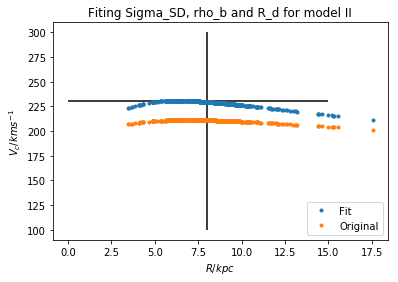

In [79]:
params_Sigma_SD_rho_b_R_d_II = np.array([Sigma_d_SD_II,rho_h_II,R_d_II])
#plt.plot(R,Vc_Sigma_SD_rho_b_R_d(R,pars_R_d_rho_b_R_d_min),label='array in R')
plt.plot(vecRp,Vc_Sigma_SD_rho_b_R_d_II(vecRp,pars_R_d_rho_b_R_d_II_min),'.',label='Fit')
plt.plot(vecRp,Vc_Sigma_SD_rho_b_R_d_II(vecRp,params_Sigma_SD_rho_b_R_d_II),'.',label='Original')
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.legend(loc='lower right', prop={'size':10})
plt.title("Fitting Sigma_SD, rho_b and R_d for model II")
plt.hlines(230,0,15)
plt.vlines(8,100,300)
plt.savefig('Fit_Sigma_SD_rho_b_R_d_II.pdf')

# $R_{d}$, $\Sigma_{SD}$ and $\rho_{b}$ for model I 

In [9]:
#parameters model I
rho_b_I = 0.427e9#sM/kpc^3
a_h_I = 3.83#kpc
rho_h_I = 0.711e9#SM/kpc^3
alpha_h_I = -2.
beta_h_I = 2.96
R_d_I = 2.0#kpc
R_d_II = 3.2#kpc
Sigma_d_SD_I = (1905.0e6)*0.75#SM/kpc^2
Sigma_g_ISM_I = (1905.0e6)*0.25#SM/kpc^2

In [68]:
def Vc_Sigma_SD_rho_b_R_d_I(R,parameter,alpha_h=alpha_h_I,beta_h=beta_h_I,a_h=a_h_I,rho_h=rho_h_I,Sigma_g_ISM=Sigma_g_ISM_I):
    Sigma_d_SD,rho_b,R_d = parameter
    def Vc_b(R):
        def I_b(x,R):
            e = np.sqrt(1. - q_b**2.)
            n = x**(2.-alpha_b)*np.exp(-(R**2.*x**2.)/r_b**2.)
            d = np.sqrt(1.-x**2.*e**2.)
            t = R**2.*(R/a_b)**(-alpha_b)
            return (t*n)/d
        Integral_b = []
        for i in range (0,len(R)):
            result = integrate.quad(I_b,0,1,args=(R[i]))[0]
            Integral_b.append(result)
        return np.array(Integral_b)
    def Vc_DM(R):
        def I_h(x,R):
            e = np.sqrt(1.- q_h**2.)
            n = x**(2.-alpha_h)*(1.+ (x*R)/(a_h))**(alpha_h-beta_h)
            d = np.sqrt(1-x**2.*e**2)
            t = R**2.*(R/a_h)**(-alpha_h)
            result = (t*n)/d
            return result
        Integral_DM = []
        for i in range (0,len(R)):
            result = integrate.quad(I_h,0,1,args=(R[i]))[0]
            Integral_DM.append(result)
        return np.array(Integral_DM)
    def V2_c_SD(R):
        result = (R_d/R) - np.exp(-R/R_d) - (np.exp(-R/R_d)*R_d/R)
        return result
    def Vc_ISM(R):
        def M_g_ISM(u,R):
            return R*u*np.exp(-((R*u)/(2.*R_d))-(R_m/(R*u)))
        Integral_M_g = []
        for i in range (0,len(R)):
            result = integrate.quad(M_g_ISM,0,1,args=(R[i]))[0]
            Integral_M_g.append(result)
        return np.array(Integral_M_g)
    suma = 4.*np.pi*G*q_b*rho_b*Vc_b(R) + 4.*np.pi*G*q_h*rho_h*Vc_DM(R) + 2.*np.pi*G*Sigma_d_SD*R_d*V2_c_SD(R) + 2.*np.pi*Sigma_g_ISM*G*Vc_ISM(R)
    return np.sqrt(suma)

In [69]:
def Xi2_Sigma_SD_rho_b_R_d_I(parameters):
    Sigma_d_SD,rho_b,R_d = parameters
    par = np.exp(Sigma_d_SD),np.exp(rho_b),R_d
    model = Vc_Sigma_SD_rho_b_R_d_I(vecRp,par)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [70]:
x0_Sigma_SD_rho_b_R_d_I = np.array([np.log(0.1e8),np.log(0.1e8),1.])

In [74]:
LS_Sigma_SD_rho_b_R_d_I = minimize(Xi2_Sigma_SD_rho_b_R_d_I,x0_Sigma_SD_rho_b_R_d_I,method='L-BFGS-B',bounds=((np.log(0.1e8),np.log(1500.0e8)),(np.log(0.1e8),np.log(1000.0e8)),(1.0,9.),))

In [75]:
print LS_Sigma_SD_rho_b_R_d_I

      fun: 2022.0789142232188
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([51.30011687,  0.87959506, 45.01457624])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 256
      nit: 44
   status: 0
  success: True
        x: array([21.78510098, 16.20185666,  1.83933312])


In [76]:
pars_R_d_rho_b_R_d_I_min = np.array([np.exp(LS_Sigma_SD_rho_b_R_d_I.x[0]),np.exp(LS_Sigma_SD_rho_b_R_d_I.x[1]),LS_Sigma_SD_rho_b_R_d_I.x[2]])
print pars_R_d_rho_b_R_d_I_min

[2.89167276e+09 1.08736900e+07 1.83933312e+00]


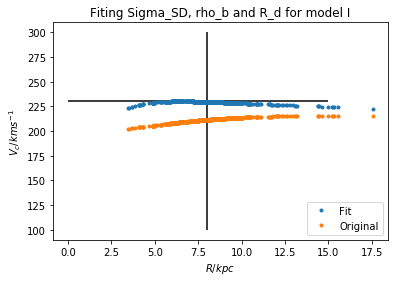

In [78]:
params_Sigma_SD_rho_b_R_d_I = np.array([Sigma_d_SD_I,rho_h_I,R_d_I])
#plt.plot(R,Vc_Sigma_SD_rho_b_R_d(R,pars_R_d_rho_b_R_d_min),label='array in R')
plt.plot(vecRp,Vc_Sigma_SD_rho_b_R_d_I(vecRp,pars_R_d_rho_b_R_d_I_min),'.',label='Fit')
plt.plot(vecRp,Vc_Sigma_SD_rho_b_R_d_I(vecRp,params_Sigma_SD_rho_b_R_d_I),'.',label='Original')
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.legend(loc='lower right', prop={'size':10})
plt.title("Fitting Sigma_SD, rho_b and R_d for model I")
plt.hlines(230,0,15)
plt.vlines(8,100,300)
plt.savefig('Fit_Sigma_SD_rho_b_R_d_I.pdf')

# $R_{d}$, $\Sigma_{SD}$ and $\rho_{b}$ for model I with NFW

In [10]:
def Vc_Sigma_SD_rho_b_R_d_I_NFW(R,parameter,alpha_h=1.,beta_h=3.,a_h=a_h_I,rho_h=rho_h_I,Sigma_g_ISM=Sigma_g_ISM_I):
    Sigma_d_SD,rho_b,R_d = parameter
    def Vc_b(R):
        def I_b(x,R):
            e = np.sqrt(1. - q_b**2.)
            n = x**(2.-alpha_b)*np.exp(-(R**2.*x**2.)/r_b**2.)
            d = np.sqrt(1.-x**2.*e**2.)
            t = R**2.*(R/a_b)**(-alpha_b)
            return (t*n)/d
        Integral_b = []
        for i in range (0,len(R)):
            result = integrate.quad(I_b,0,1,args=(R[i]))[0]
            Integral_b.append(result)
        return np.array(Integral_b)
    def Vc_DM(R):
        def I_h(x,R):
            e = np.sqrt(1.- q_h**2.)
            n = x**(2.-alpha_h)*(1.+ (x*R)/(a_h))**(alpha_h-beta_h)
            d = np.sqrt(1-x**2.*e**2)
            t = R**2.*(R/a_h)**(-alpha_h)
            result = (t*n)/d
            return result
        Integral_DM = []
        for i in range (0,len(R)):
            result = integrate.quad(I_h,0,1,args=(R[i]))[0]
            Integral_DM.append(result)
        return np.array(Integral_DM)
    def V2_c_SD(R):
        result = (R_d/R) - np.exp(-R/R_d) - (np.exp(-R/R_d)*R_d/R)
        return result
    def Vc_ISM(R):
        def M_g_ISM(u,R):
            return R*u*np.exp(-((R*u)/(2.*R_d))-(R_m/(R*u)))
        Integral_M_g = []
        for i in range (0,len(R)):
            result = integrate.quad(M_g_ISM,0,1,args=(R[i]))[0]
            Integral_M_g.append(result)
        return np.array(Integral_M_g)
    suma = 4.*np.pi*G*q_b*rho_b*Vc_b(R) + 4.*np.pi*G*q_h*rho_h*Vc_DM(R) + 2.*np.pi*G*Sigma_d_SD*R_d*V2_c_SD(R) + 2.*np.pi*Sigma_g_ISM*G*Vc_ISM(R)
    return np.sqrt(suma)

In [11]:
def Xi_Sigma_SD_rho_b_R_d_I_NFW(parameters):
    Sigma_d_SD,rho_b,R_d = parameters
    par = np.exp(Sigma_d_SD),np.exp(rho_b),R_d
    model = Vc_Sigma_SD_rho_b_R_d_I_NFW(vecRp,par)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [16]:
x0_Sigma_SD_rho_b_R_d_I_NFW = np.array([np.log(0.00001e8),np.log(0.00001e8),0.00001])

In [17]:
LS_Sigma_SD_rho_b_R_d_I_NFW = minimize(Xi_Sigma_SD_rho_b_R_d_I_NFW,x0_Sigma_SD_rho_b_R_d_I_NFW,method='L-BFGS-B',bounds=((np.log(0.00001e8),np.log(15.0e8)),(np.log(0.00001e8),np.log(10.0e8)),(0.00001,9.),))

In [18]:
print LS_Sigma_SD_rho_b_R_d_I_NFW

      fun: 135553.33506900127
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.        , 0.03201421, 0.        ])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 4
      nit: 0
   status: 0
  success: True
        x: array([6.90775528e+00, 6.90775528e+00, 1.00000000e-05])


In [19]:
pars_R_d_rho_b_R_d_I_NFW_min = np.array([np.exp(LS_Sigma_SD_rho_b_R_d_I_NFW.x[0]),np.exp(LS_Sigma_SD_rho_b_R_d_I_NFW.x[1]),LS_Sigma_SD_rho_b_R_d_I_NFW.x[2]])
print pars_R_d_rho_b_R_d_I_NFW_min

[1.e+03 1.e+03 1.e-05]


# $\rho_{h}$ and $\rho_{b}$ for model I

In [56]:
#parameters
rho_b_I = 0.427e9#sM/kpc^3
a_h_I = 3.83#kpc
rho_h_I = 0.711e9#SM/kpc^3
#alpha_h_I = -2.
#beta_h_I = 2.96
R_d_I = 2.0#kpc
Sigma_d_SD_I = (1905.0e6)*0.75#SM/kpc^2
Sigma_g_ISM_I = (1905.0e6)*0.25#SM/kpc^2

In [57]:
def Vc_Sigma_SD_rho_b_I(R,parameter,alpha_h=1.,beta_h=3.,R_d=R_d_I,a_h=a_h_I,rho_h=rho_h_I,Sigma_g_ISM=Sigma_g_ISM_I):
    Sigma_d_SD,rho_b = parameter
    def Vc_b(R):
        def I_b(x,R):
            e = np.sqrt(1. - q_b**2.)
            n = x**(2.-alpha_b)*np.exp(-(R**2.*x**2.)/r_b**2.)
            d = np.sqrt(1.-x**2.*e**2.)
            t = R**2.*(R/a_b)**(-alpha_b)
            return (t*n)/d
        Integral_b = []
        for i in range (0,len(R)):
            result = integrate.quad(I_b,0,1,args=(R[i]))[0]
            Integral_b.append(result)
        return np.array(Integral_b)
    def Vc_DM(R):
        def I_h(x,R):
            e = np.sqrt(1.- q_h**2.)
            n = x**(2.-alpha_h)*(1.+ (x*R)/(a_h))**(alpha_h-beta_h)
            d = np.sqrt(1-x**2.*e**2)
            t = R**2.*(R/a_h)**(-alpha_h)
            result = (t*n)/d
            return result
        Integral_DM = []
        for i in range (0,len(R)):
            result = integrate.quad(I_h,0,1,args=(R[i]))[0]
            Integral_DM.append(result)
        return np.array(Integral_DM)
    def V2_c_SD(R):
        result = (R_d/R) - np.exp(-R/R_d) - (np.exp(-R/R_d)*R_d/R)
        return result
    def Vc_ISM(R):
        def M_g_ISM(u,R):
            return R*u*np.exp(-((R*u)/(2.*R_d))-(R_m/(R*u)))
        Integral_M_g = []
        for i in range (0,len(R)):
            result = integrate.quad(M_g_ISM,0,1,args=(R[i]))[0]
            Integral_M_g.append(result)
        return np.array(Integral_M_g)
    suma = 4.*np.pi*G*q_b*rho_b*Vc_b(R) + 4.*np.pi*G*q_h*rho_h*Vc_DM(R) + 2.*np.pi*G*Sigma_d_SD*R_d*V2_c_SD(R) + 2.*np.pi*Sigma_g_ISM*G*Vc_ISM(R)
    return np.sqrt(suma)

In [58]:
def Xi2_Sigma_SD_rho_I(parameters):
    Sigma_d_SD,rho_b = parameters
    par = np.exp(Sigma_d_SD),np.exp(rho_b)
    model = Vc_Sigma_SD_rho_b_I(vecRp,par)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [79]:
x0_Sigma_SD_rho_b_I = np.array([np.log(0.01),np.log(0.01)])

In [81]:
LS_Sigma_SD_rho_b_I = minimize(Xi2_Sigma_SD_rho_I,x0_Sigma_SD_rho_b_I,method='L-BFGS-B',bounds=((np.log(0.01),np.log(15.0e8)),(np.log(0.01),np.log(10.0e8)),))

In [82]:
print LS_Sigma_SD_rho_b_I

      fun: 159163.1894046394
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([0., 0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 3
      nit: 0
   status: 0
  success: True
        x: array([-4.60517019, -4.60517019])


In [83]:
print np.exp(LS_Sigma_SD_rho_b_I.x)

[0.01 0.01]


# $R_{d}$ and $\rho_{b}$ for model I

In [32]:
def Vc_R_d_rho_b_I(R,parameter,alpha_h=1.,beta_h=3.,a_h=a_h_I,rho_h=rho_h_I,Sigma_d_SD=Sigma_d_SD_I,Sigma_g_ISM=Sigma_g_ISM_I):
    R_d,rho_b = parameter
    def Vc_b(R):
        def I_b(x,R):
            e = np.sqrt(1. - q_b**2.)
            n = x**(2.-alpha_b)*np.exp(-(R**2.*x**2.)/r_b**2.)
            d = np.sqrt(1.-x**2.*e**2.)
            t = R**2.*(R/a_b)**(-alpha_b)
            return (t*n)/d
        Integral_b = []
        for i in range (0,len(R)):
            result = integrate.quad(I_b,0,1,args=(R[i]))[0]
            Integral_b.append(result)
        return np.array(Integral_b)
    def Vc_DM(R):
        def I_h(x,R):
            e = np.sqrt(1.- q_h**2.)
            n = x**(2.-alpha_h)*(1.+ (x*R)/(a_h))**(alpha_h-beta_h)
            d = np.sqrt(1-x**2.*e**2)
            t = R**2.*(R/a_h)**(-alpha_h)
            result = (t*n)/d
            return result
        Integral_DM = []
        for i in range (0,len(R)):
            result = integrate.quad(I_h,0,1,args=(R[i]))[0]
            Integral_DM.append(result)
        return np.array(Integral_DM)
    def V2_c_SD(R):
        result = (R_d/R) - np.exp(-R/R_d) - (np.exp(-R/R_d)*R_d/R)
        return result
    def Vc_ISM(R):
        def M_g_ISM(u,R):
            return R*u*np.exp(-((R*u)/(2.*R_d))-(R_m/(R*u)))
        Integral_M_g = []
        for i in range (0,len(R)):
            result = integrate.quad(M_g_ISM,0,1,args=(R[i]))[0]
            Integral_M_g.append(result)
        return np.array(Integral_M_g)
    suma = 4.*np.pi*G*q_b*rho_b*Vc_b(R) + 4.*np.pi*G*q_h*rho_h*Vc_DM(R) + 2.*np.pi*G*Sigma_d_SD*R_d*V2_c_SD(R) + 2.*np.pi*Sigma_g_ISM*G*Vc_ISM(R)
    return np.sqrt(suma)

In [51]:
def Xi2_rho_b_R_d_I(parameters):
    R_d,rho_b = parameters
    par = R_d,np.exp(rho_b)
    model = Vc_R_d_rho_b_I(vecRp,par)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [53]:
x0_rho_b_R_d_I = np.array([-40.0,np.log(0.00001e8)])

In [54]:
LS_R_d_rho_b_I = minimize(Xi2_rho_b_R_d_I,x0_rho_b_R_d_I,method='L-BFGS-B',bounds=((-40.0,4.),(np.log(0.00001e8),np.log(30.0e8)),))
print LS_R_d_rho_b_I

      fun: 1476702.0388944303
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([5.16846776e+03, 6.98491931e-02])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 3
      nit: 0
   status: 0
  success: True
        x: array([-40.        ,   6.90775528])


In [55]:
pars_R_d_rho_b_I_min = np.array([LS_R_d_rho_b_I.x[0],np.exp(LS_R_d_rho_b_I.x[1])])
print pars_R_d_rho_b_I_min

[ -40. 1000.]
